# Golf Game Improvement EDA


**Overview :**

How well a player scores in golf is based on his/her skills in various parts of the game. It takes practice with a specific purpose in mind to score better. This data project will give users specific areas to practice in order to reach a specific goal, helping people improve their games.

**Function :**

- Input: "Please input your desired" + Score
- Output: "The typical player with this score has the following stats:" + Greens + Putts + Fairways + "This is what you should aim for in your next round."

**Definitions :**

- Score (INT): The total number of shots taken in the round.
- Greens (INT): The number of greens in regulation (out of 18). [More Info](https://www.liveabout.com/what-is-green-in-regulation-gir-1560864)
- Putts (INT): The total number of putts taken in the round.
- Fairways (INT): The total number of fairways hit in a round (out of 14 assuming a course with 14 fairways)

**Concerns :**

- Skills are highly correlated. When you hit the fairway, you are more likely to get on the green.
- How to deal with courses that have different difficulty levels??
- There are multiple combinations to shooting a particular score. You could hit every green and make few putts, or hit few greens and make all your putts. How do we accommodate this?
- Different courses have different numbers of fairways depending on how many par 3's they have

### Personal Data

Each record in my data set represents a round of golf that I played and includes details about that round such as the score and stats (e.g. number of putts, number of fairways). I cleaned the data below...

In [57]:
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
# Import Round Data
round_data = pd.read_csv('./data/rounds.csv', usecols=["Name", "Date", "Course", "Course Rating"])
round_data.columns = ['Rounds', 'Date', 'Course', 'Course Rating']
round_data['Date'] = pd.to_datetime(round_data['Date'])

# Import Hole Data
hole_data = pd.read_csv('./data/holes.csv')
hole_data['Greens'] = hole_data['Greens'].map({'checked': '1'})
hole_data['Greens'] = hole_data['Greens'].astype('float64')
hole_data['Sand'] = hole_data['Sand'].map({'Y': '1', 'N': '0'})
hole_data['Sand'] = hole_data['Sand'].astype('float64')
hole_data['Scrambling'] = hole_data['Scrambling'].map({'Y': '1', 'N': '0'})
hole_data['Scrambling'] = hole_data['Scrambling'].astype('float64')
hole_data['Fairways'] = hole_data['Fairways'].map({'Y': '1', 'N': '0'})
hole_data['Fairways'] = hole_data['Fairways'].astype('float64')

# Create Scores Summary Table
scores_summary = hole_data.groupby(['Rounds'])[['Par', 'Score', 'Putts', 'Fairways', 'Greens']].sum()
holes_played = hole_data['Rounds'].value_counts()
relative_score = scores_summary.Score - scores_summary.Par
relative_score.sort_index(inplace = True)
relative_score.index = holes_played.index - 1
holes_played.sort_index(inplace = True)
holes_played.index = holes_played.index - 1
scores_summary = round_data.merge(scores_summary, on='Rounds')
scores_summary['Holes Played'] = holes_played
scores_summary['Relative Score'] = relative_score

#Remove records without stats tracked
scores_summary.drop([3,5], inplace=True)
scores_summary.reset_index(inplace=True)
scores_summary.drop(['index','Rounds'], inplace=True, axis=1)

#Combine 9 hole scores
s1 = scores_summary.iloc[1,4:]
s2 = scores_summary.iloc[11,4:]
s2a = scores_summary.iloc[11,:4]
s = s1 + s2
scores_summary.iloc[11] = s2a.append(s)
scores_summary.drop([1], inplace=True)

# Add column for relative score given course difficulty
scores_summary['Relative Score w/ Rating'] = scores_summary.Score.astype('float64') - scores_summary['Course Rating']

scores_summary

,Date,Course,Course Rating,Par,Score,Putts,Fairways,Greens,Holes Played,Relative Score,Relative Score w/ Rating
0,2019-07-20,Wilshire Country Club,71.8,71,98,34.0,5.0,4.0,18,20,26.2
2,2019-07-27,Wilshire Country Club,71.8,71,98,33.0,10.0,3.0,18,16,26.2
3,2019-06-16,Sandpiper,75.1,72,86,32.0,5.0,4.0,18,25,10.9
4,2019-08-17,Wilshire Country Club,71.8,71,91,29.0,5.0,0.0,18,12,19.2
5,2019-08-24,Wilshire Country Club,71.8,71,83,28.0,5.0,4.0,18,20,11.2
6,2019-09-07,Simi Hills,70.3,71,89,29.0,5.0,3.0,18,27,18.7
7,2019-09-14,Brookside #2,68.9,70,95,37.0,4.0,3.0,18,14,26.1
8,2020-01-19,Los Verdes,72.2,71,86,33.0,7.0,5.0,18,13,13.8
9,2020-04-24,Los Robles,68.7,69,85,31.0,5.0,5.0,18,27,16.3
10,2019-11-25,Owl's Nest,71.2,72,92,36.0,7.0,5.0,18,10,20.8


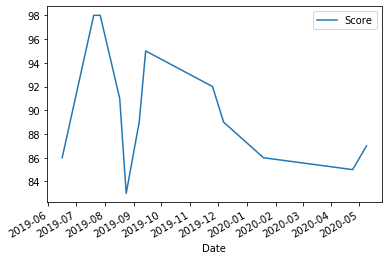

In [88]:
# Scores plotted over time
scores_summary.plot(x="Date", y="Score")

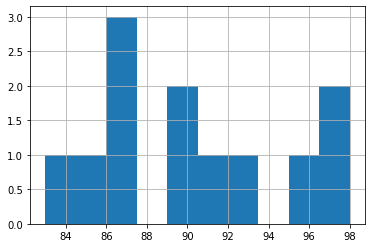

In [61]:
# Distribution of scores
scores_summary['Score'].hist()

In [62]:
# Function to find the average of stats given a specific range of scores.

def find_stats(input_score):
    df = scores_summary[(scores_summary["Score"] > input_score) & (scores_summary["Score"] < input_score + 10) & (scores_summary["Holes Played"] == 18)]
    df = pd.DataFrame(df[['Putts','Fairways','Greens']].mean())
    df.columns = [str(input_score) + 's']
    return df

In [63]:
# Find the average stats for all scores in ranges 80-90 and 90-100

shoot_80s = find_stats(input_score = 80)
shoot_90s = find_stats(input_score = 90)
shoot_80s.merge(shoot_90s, left_index=True, right_index = True)

,80s,90s
Putts,30.571429,33.8
Fairways,5.857143,6.2
Greens,4.000000,3.0


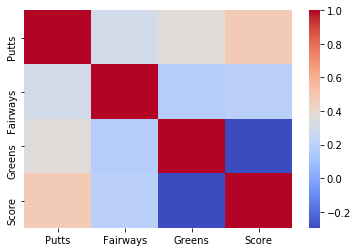

In [64]:
# What stats are most highly correlated with score?
correlations = scores_summary[["Putts", "Fairways", "Greens", "Score"]].corr()
sns.heatmap(correlations, cmap='coolwarm')

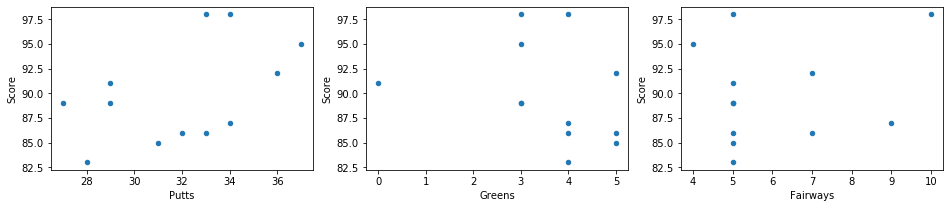

In [65]:
# Show the relationship between each stat and the score using a scatterplot
fig, axs = plt.subplots(1, 3, sharey=False)
scores_summary.plot(kind="scatter", x="Putts", y="Score", ax=axs[0], figsize=(16, 3))
scores_summary.plot(kind="scatter", x="Greens", y="Score", ax=axs[1], figsize=(16, 3))
scores_summary.plot(kind="scatter", x="Fairways", y="Score", ax=axs[2], figsize=(16, 3))

### PGA Tour Data

Using a publically available dataset with the stats and average scores for professional golfers could be a way of expanding my dataset. Each record in this PGA Tour dataset represents a player and a summary of statistics for all the rounds they played between 2010 and 2018.

In [23]:
# Import PGA Tour Data
data = pd.read_csv('./data/pgaTourData.csv')

In [89]:
# Remove NA records.
cleaned_data = data[data['gir'].notna()]

# Remove unecessary features
cleaned_data = cleaned_data[['gir','Average Putts','Average Score','Fairway Percentage']]

# Convert average percentages per round into averages totals per round 
cleaned_data['gir'] = (cleaned_data['gir']/100)*18
cleaned_data['Fairway Percentage'] = (cleaned_data['Fairway Percentage']/100)*14
cleaned_data['Holes Played'] = 18

# Rename columns
cleaned_data.columns = ['Greens','Putts','Score','Fairways','Holes Played']

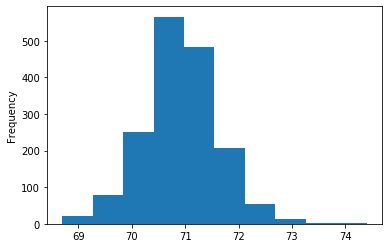

In [67]:
# Distrubution of the average scores for all 2312 players in the dataset
cleaned_data['Score'].plot(kind='hist')

In [68]:
# Function to find the average of stats given a specific score.

def find_avg_stats(score):
    stats = cleaned_data[(cleaned_data['Score'] >= score) & (cleaned_data['Score'] < (score+1))].mean()
    return stats.rename(score)

attributes = pd.DataFrame()
for i in range(69,75):
    stats = find_avg_stats(i)
    attributes = attributes.append(stats)
    
attributes

,Fairways,Greens,Holes Played,Putts,Score
69,8.668312,12.181105,18.0,28.902197,69.676947
70,8.689830,11.945433,18.0,29.111790,70.601705
71,8.527404,11.660652,18.0,29.246195,71.385104
72,8.320646,11.344292,18.0,29.486923,72.297560
73,8.132400,10.861457,18.0,29.327143,73.219714
74,6.187300,9.720000,18.0,28.905000,74.331000


### Add Pro Scores to My Scores

By adding in average stats for pros who shoot on average between 68 and 72, I can understand how my stats relate to theirs.

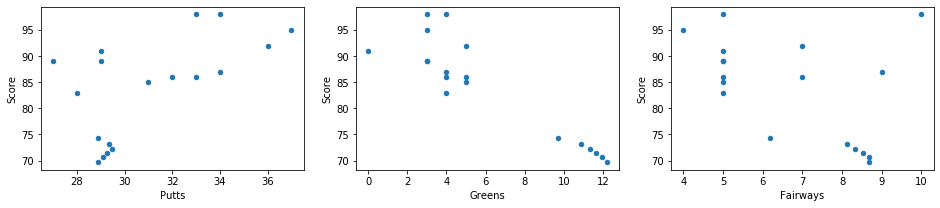

In [81]:
fig, axs = plt.subplots(1, 3, sharey=False)
scores_summary_added_pros.plot(kind="scatter", x="Putts", y="Score", ax=axs[0], figsize=(16, 3))
scores_summary_added_pros.plot(kind="scatter", x="Greens", y="Score", ax=axs[1], figsize=(16, 3))
scores_summary_added_pros.plot(kind="scatter", x="Fairways", y="Score", ax=axs[2], figsize=(16, 3))

### Fit Data With A Linear Model

Understand the linear relationship between putts, greens, and fairways, with a target variable of score.

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
def fit_and_score(df,target):

    lr = LinearRegression()

    features = ['Putts','Fairways','Greens']
    X = df[features]
    y = df[target]
    lr.fit(X,y)
    y_pred = lr.predict(X)
    r2 = lr.score(X,y)
    coefficients = lr.coef_
    intercept = lr.intercept_
    frame = pd.DataFrame({'Original': y,'Predicted': y_pred})
    
    print('r2:'+str(r2))
    print('coeffs:'+str(coefficients))
    print('intercept:'+str(intercept))
    
    return {'model':lr, 'vals': frame,'score': r2, 'coeffs': coefficients}

In [93]:
test1 = fit_and_score(scores_summary,'Score')

r2:0.5040370537448309
coeffs:[ 1.03747011  0.27190258 -2.00884601]
intercept:62.37102829762922


In [85]:
test2 = fit_and_score(scores_summary_added_pros,'Score')

r2:0.91387551657205
coeffs:[ 1.04414357  0.26694735 -2.03562599]
intercept:62.28320292506628


In [86]:
test3 = fit_and_score(scores_summary,'Relative Score w/ Rating')

r2:0.4908684019576317
coeffs:[ 1.17435545  0.14283869 -2.02812479]
intercept:-12.462763219803524


$$y = 1.0p + .27f - 2.0g + 62$$

### Optimization

Add more scores of the professionals to my dataset to add variance
Add the difficulty of the course. Use the course rating to create a relative score
Fit a random forest regressor. Might improve accuracy
Optimization. Use SciPy libraries to solve equation


In [50]:
c = [1.04414357, 0.26694735, -2.03562599]
A = [[-3, 1], [1, 2]]
#b = [6, 4]
putts_bounds = (31, 31)
fairways_bounds = (7, 7)
greens_bounds = (5, 5)

from scipy.optimize import linprog
res = linprog(c,  bounds=[putts_bounds, fairways_bounds, greens_bounds])

In [51]:
print(res)

     con: array([], dtype=float64)
     fun: 24.058952169999998
 message: 'The solution was determined in presolve as there are no non-trivial constraints.'
     nit: 0
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([31.,  7.,  5.])
